In [1]:
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

def my_plot (x1, y1, xerr = 0, yerr = 0, title="", xlabel="", ylabel="", number=1, approx=False, fig_=False, ax1_=False):

    if (approx):
        k1, s1 = np.polyfit (x1, y1, deg=1, cov=True)

    plt.figure()

    fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

    ax1.set_title (title)

    ax1.set_ylabel (ylabel) 
    ax1.set_xlabel (xlabel)

    ax1.scatter (x1, y1, marker=".", s = 100)

    ax1.errorbar (x1, y1, xerr=xerr, yerr=yerr, fmt='none')

    if (approx):
        ax1.plot (x1, np.poly1d (k1)(x1))

    else:
        ax1.plot (x1, y1)

    plt.grid()
    plt.savefig(f"./picturies/graph{number}.png", dpi=100)
    plt.show()

/tmp/ipykernel_14042/227415613.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [2]:
pd_data = pd.read_csv("data.csv")
data = pd_data.to_numpy ()

In [3]:
background = data[11][1:-18]
background

array([112.0, 140.0, 127.0, 143.0, 120.0, 122.0, 147.0, 113.0, 106.0,
       144.0, 130.0, 157.0, 120.0, 106.0, 146.0], dtype=object)

In [4]:
background_aver = np.average (background)
d_background = np.sqrt (np.var (background))
print (f"{background_aver} +- {d_background}")

128.86666666666667 +- 15.827683202400646


In [5]:
N0_tmp = data[1][1:]
N0_tmp

array([182901.0, 180740.0, 179313.0, 169825.0, 168840.0, 174542.0,
       178671.0, 175655.0, 178531.0, 179535.0, 178863.0, 178590.0,
       180343.0, 179662.0, 179531.0, 179703.0, 180394.0, 180742.0,
       181651.0, 180054.0, 180374.0, 180820.0, 180517.0, 180373.0,
       180481.0, 180033.0, 180998.0, 180188.0, 180210.0, 180338.0,
       181047.0, 179771.0, 180238.0], dtype=object)

In [6]:
N_pb_ = np.array ([data[2][1:-18], data[3][1:-18], data[4][1:-18]])

In [7]:
N_fe_ = np.array ([data[5][1:-18], data[6][1:-18], data[7][1:-18]])

In [8]:
N_al_ = np.array ([data[8][1:-18], data[9][1:-18], data[10][1:-18]])

In [9]:
dh = 0.01 # погрешность штангенциркулся

In [10]:
h_pb = np.array ([data[13][1:6], data[14][1:6], data[15][1:6]])
h_pb_aver = np.average (h_pb, axis=1)
d_h_pb = np.array ([ np.sqrt(i) for i in np.var (h_pb, axis=1)]) + dh
print (f"{h_pb_aver} +- {d_h_pb}")

[0.4699999999999999 0.9279999999999999 1.402] +- [0.01632456 0.01748331 0.014     ]


In [11]:
h_fe = np.array ([data[16][1:6], data[17][1:6], data[18][1:6]])
h_fe_aver = np.average (h_fe, axis=1)
d_h_fe = np.array ([np.sqrt(i) for i in np.var (h_fe, axis=1)]) + dh
print (f"{h_fe_aver} +- {d_h_fe}")

[1.012 2.022 3.036] +- [0.014 0.014 0.018]


In [12]:
h_al = np.array ([data[19][1:6], data[20][1:6], data[21][1:6]])
h_al_aver = np.average (h_al, axis=1)
d_h_al = np.array ([np.sqrt (i) for i in np.var (h_al, axis=1)]) + dh
print (f"{h_al_aver} +- {d_h_al}")

[2.0 4.002 5.984] +- [0.01632456 0.014      0.02019804]


Вычитаем фон


In [13]:
N0 = N0_tmp - background_aver
N_pb = N_pb_ - background_aver
N_fe = N_fe_ - background_aver
N_al = N_al_ - background_aver

Среднее число частиц без задерживающих материалов:

In [14]:
N0_aver = np.average (N0)
dN0 = np.sqrt (np.var (N0)) + d_background # погрещность фона статистическая
print (f"{N0_aver} +- {dN0}")

179067.31515151527 +- 2929.225724795813


Среднее число частиц для свинца:

In [15]:
N_pb_aver = np.array (np.average (N_pb, axis=1))
d_N_pb = np.array ([np.sqrt (i) for i in np.var (N_pb, axis=1)]) + d_background
print (f"{N_pb_aver} +- {d_N_pb}")

[87207.99999999999 45490.33333333332 23947.133333333342] +- [908.30968053 780.28297512 383.33550625]


Среднее число частиц для стали:

In [16]:
N_fe_aver = np.array (np.average (N_fe, axis=1))
d_N_fe = np.array ([np.sqrt (i) for i in np.var (N_fe, axis=1)]) + d_background
print (f"{N_fe_aver} +- {d_N_fe}")

[89134.19999999998 42821.999999999985 21775.533333333336] +- [1023.36457858  354.4281098   254.83306668]


Среднее число частиц для алюминия:

In [17]:
N_al_aver = np.array (np.average (N_al, axis=1))
d_N_al = np.array ([np.sqrt (i) for i in np.var (N_al, axis=1)]) + d_background
print (f"{N_al_aver} +- {d_N_al}")

[105336.39999999998 62587.86666666665 37879.79999999998] +- [607.12439007 536.36298033 275.02764891]


<Figure size 432x288 with 0 Axes>

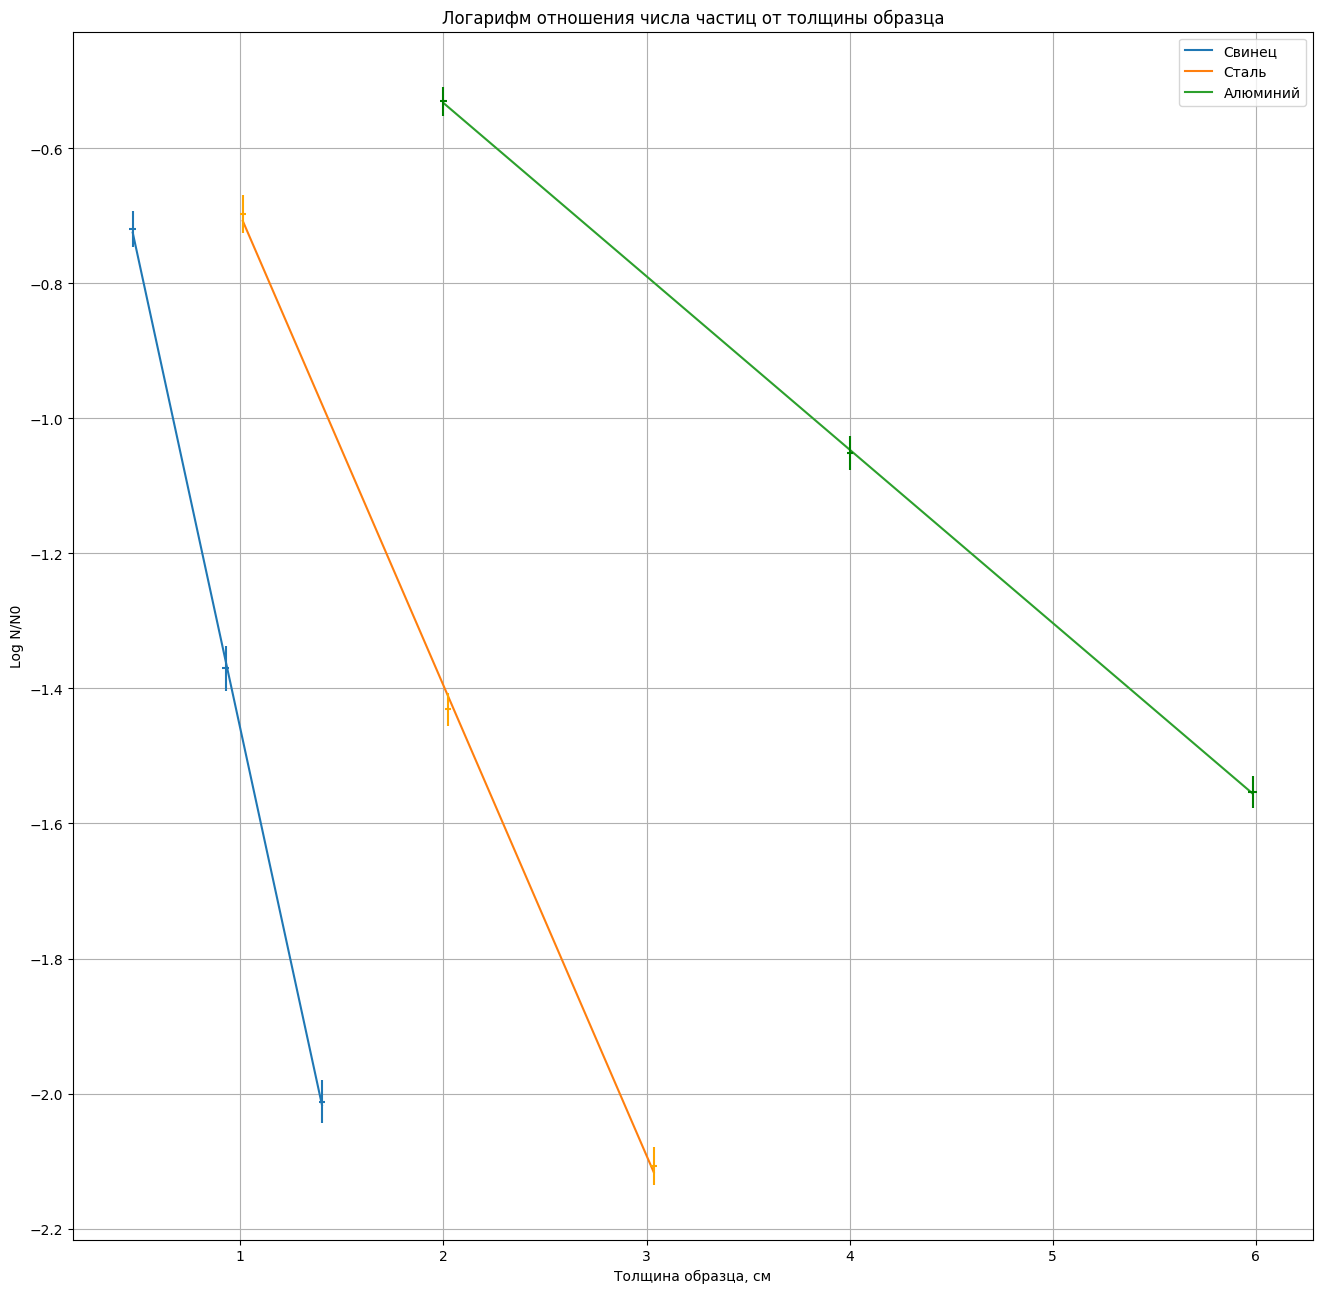

In [84]:
plt.figure()

fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.set_title ("Логарифм отношения числа частиц от толщины образца")

ax1.set_ylabel ("Log N/N0") 
ax1.set_xlabel ("Толщина образца, см")

x = np.array ([h_pb_aver, h_fe_aver, h_al_aver])
y = np.array ([[np.log (i) for i in N_pb_aver / N0_aver], [np.log (j) for j in N_fe_aver / N0_aver], [np.log (k) for k in N_al_aver / N0_aver]])

k = np.array ([np.polyfit (list(x[i]), list(y[i]), deg=1) for i in range(x.shape[0])])

ax1.plot (x[0][0:3:2], x[0][0:3:2] * k[0][0] + k[0][1], label="Свинец")
ax1.plot (x[1][0:3:2], x[1][0:3:2] * k[1][0] + k[1][1], label="Сталь")
ax1.plot (x[2][0:3:2], x[2][0:3:2] * k[2][0] + k[2][1], label="Алюминий")

ax1.errorbar (x[0], y[0], xerr=d_h_pb, yerr=d_N_pb / N_pb_aver + dN0/N0_aver, fmt='none')
ax1.errorbar (x[1], y[1], xerr=d_h_fe, yerr=d_N_fe / N_fe_aver + dN0/N0_aver, fmt='none', color="orange")
ax1.errorbar (x[2], y[2], xerr=d_h_al, yerr=d_N_al / N_al_aver + dN0/N0_aver, fmt='none', color="green")

plt.legend()
plt.grid()
plt.savefig(f"./picturies/graph1.png", dpi=100)
plt.show()

In [79]:
mu = np.array ([-i[0] for i in k])
mu

array([1.38655382, 0.69630277, 0.2567177 ])

In [80]:
d_mu = mu * dN0 /(N0_aver)
d_mu

array([0.02268158, 0.01139029, 0.00419945])

Энергия  
По графику: 0.55 МэВ
По таблице: 0.35 - 0.45 МэВ